In [60]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Import stats Lbrary
from scipy.stats import chi2_contingency, f_oneway
!pip install colorama
from colorama import Fore
import scipy.stats as stats
import statsmodels.api as sma

In [62]:
#from google.colab import drive
#drive.mount('/content/drive')

In [63]:
# Load the data given by Telco
df = pd.read_csv('Customer_Churn.csv')

# Customer Churn Analysis


---


## Context

 The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to  steal customers. Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
1.	Help them identify the types of customers who churn
2.	Predict who of their current customers will churn next month.

To do this, they offer you a file of \<a href='https://www.kaggle.com/blastchar/telco-customer-churn/data#'> 7,000 customers <a>. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month. The data also offers demographic data and data on the services that each customer purchases. Finally there is information on the payments those customers make.

Deliverables - What is expected Week 1
A presentation explaining churn for the marketing team - any format. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.
1.	How much is churn affecting the business? How big is churn compared to the existing customer base?
2.	Explain churn by the below categories. Are there any factors that combine to be especially impactful?
    *	Customer demographics like age and gender
    *	Services used
    *	Billing information
3.	What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
4.	Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?

**DATA PROCESSING**

In [64]:
# let's get a look on the data given by Telco
display(df)
display(df.info())
df.nunique()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [65]:
df["TotalCharges"].value_counts(ascending=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [66]:
df[df["TotalCharges"]== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [67]:
# we replace where costumer had " " as value by 0
df["TotalCharges"].replace(r'^\s*$', 0, regex=True, inplace= True)

In [68]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

**DATA ANALYSIS**

In [69]:
print(df.dtypes)
print(df.describe())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.

-7043 customers

-maximum monthly charge 118$

-average total charge : 2290$

In [70]:
df.columns.duplicated().sum()

0

 analysis customer churn

In [71]:
yes_churn= df.Churn[df.Churn == 'Yes'].count()
print("Total number of customer churn: ",yes_churn , "customers")
churn_yesInPercent = round((yes_churn/df.shape[0])*100,2)
print("Percentage of customer churn: ",'{:,}'.format(churn_yesInPercent), "%") 

Total number of customer churn:  1869 customers
Percentage of customer churn:  26.54 %


In [72]:
financialValuesCustomerChurns=df[df["Churn"]== "Yes"]["TotalCharges"].sum()
financialValuesCustomerChurn=df['TotalCharges'].groupby(by=df["Churn"]).sum()
display(financialValuesCustomerChurn)
print("The value of financial customer churn: $",'{:,}'.format(financialValuesCustomerChurns))
financialPercentValuesCustomerChurns =round((financialValuesCustomerChurns/df["TotalCharges"].sum())*100,2)
print("Financial values in percentage of customers churm: ",'{:,}'.format(financialPercentValuesCustomerChurns), "%")

Churn
No     13193241.8
Yes     2862926.9
Name: TotalCharges, dtype: float64

The value of financial customer churn: $ 2,862,926.9
Financial values in percentage of customers churm:  17.83 %


In [73]:
monthlyFinancialValuesCustomerChurns=df[df["Churn"]== "Yes"]["MonthlyCharges"].sum()
monthlyFinancialValuesCustomerChurn=df['MonthlyCharges'].groupby(by=df["Churn"]).sum()
display(monthlyFinancialValuesCustomerChurn)
print("The monthly value of financial customer churn: $",'{:,}'.format(monthlyFinancialValuesCustomerChurns))
financialPercentValuesCustomerChurns=round((monthlyFinancialValuesCustomerChurn/df["MonthlyCharges"].sum())*100,2)
financialPercentValuesCustomerChurns


Churn
No     316985.75
Yes    139130.85
Name: MonthlyCharges, dtype: float64

The monthly value of financial customer churn: $ 139,130.85


Churn
No     69.5
Yes    30.5
Name: MonthlyCharges, dtype: float64

In [74]:
# daily loss of customer
dailyChargeLossCustomer=round(yes_churn/30,1)
dailyChargeLossCustomer
print("daily charges loss : ",'{:,}'.format(dailyChargeLossCustomer), "customers") 

daily charges loss :  62.3 customers


26,54% of customers churn

monthly value of charge customer churn: $ 139,130.85 

The toTAL value of Charge customer churn: $ 2,862,926.9 wich represent 17.83%

In [75]:
#numerical and categorical values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [76]:
#categorical list
listCategoricalByCustomerID =['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

categorical = df[listCategoricalByCustomerID].astype('category')
categorical


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic)
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic)
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check


In [77]:
listcategorical =['gender','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

listcategorical1 = df[listcategorical].astype('category')
listcategoricalDummies = pd.get_dummies(listcategorical1)
listcategoricalDummies

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [78]:
numericalValue = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
numericalValue.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [79]:
df['Churn Binary'] = np.where(df['Churn'] == 'Yes', 1, 0)
z=df['Churn Binary']

In [80]:
listcategorical2 =['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

listcategorical2 = df[listcategorical2].astype('category')
listcategoricalDummies = pd.get_dummies(listcategorical2)

In [81]:

x = pd.concat([listcategoricalDummies,numericalValue], axis=1)

In [82]:

df_dummies=pd.concat([x,z],axis=1)


In [83]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [84]:
churnByGender= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['gender'], aggfunc='count')
churnByGender

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [85]:
stat, p, dof, expected = chi2_contingency(churnByGender)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.48657873605618596
Hypothesis Accepted


In [86]:
churnByCitizen= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['SeniorCitizen'], aggfunc='count')
display(churnByCitizen)
stat, p, dof, expected = chi2_contingency(churnByCitizen)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


p-values: 1.510066805092378e-36
Hypothesis Rejected


In [87]:
churnByDependents= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['Dependents'], aggfunc='count')
display(churnByCitizen)
stat, p, dof, expected = chi2_contingency(churnByDependents)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


p-values: 4.9249216612154196e-43
Hypothesis Rejected


In [88]:
churnByContract= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['Contract'], aggfunc='count')
display(churnByContract)
stat, p, dof, expected = chi2_contingency(churnByContract)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


p-values: 5.863038300673391e-258
Hypothesis Rejected


In [89]:
churnByPaymentMethod= pd.pivot_table(df,values='customerID',index=['Churn'],columns=['PaymentMethod'], aggfunc='count')
display(churnByPaymentMethod)
stat, p, dof, expected = chi2_contingency(churnByPaymentMethod)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


p-values: 3.6823546520097993e-140
Hypothesis Rejected


,Total,%
No,5174,0.73463
Yes,1869,0.26537


No handles with labels found to put in legend.
No handles with labels found to put in legend.


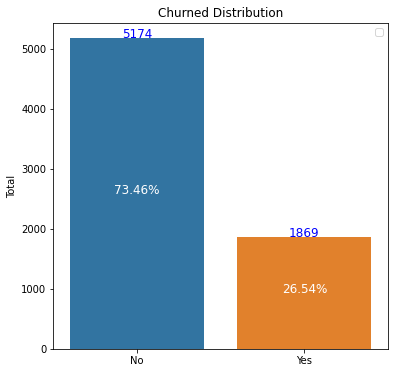

In [91]:
churn_count         = df['Churn'].value_counts().to_frame()
churn_count.columns =['Total']
churn_rate          = df['Churn'].value_counts(normalize=True).to_frame()
churn_rate.columns  =['%']
churn_data          =pd.concat([churn_count,churn_rate],axis=1)
display(churn_data)

plt.figure(figsize=(6,6))
bar =sns.barplot(data=churn_data,x=churn_data.index,y="Total")
i = 0
for tot,perc in zip(churn_data['Total'],churn_data['%']):
        bar.text(i,
                tot/2,
                str(np.round(perc*100,2))+ "%",
                fontdict=dict(color='White',fontsize=12,horizontalalignment="center"))
        bar.text(i,
                tot+10,
                str(tot),
                fontdict=dict(color='blue',fontsize=12,horizontalalignment="center"))

        i+=1
        plt.title("Churned Distribution")
        plt.legend()

In [ ]:
def generate_barchar(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

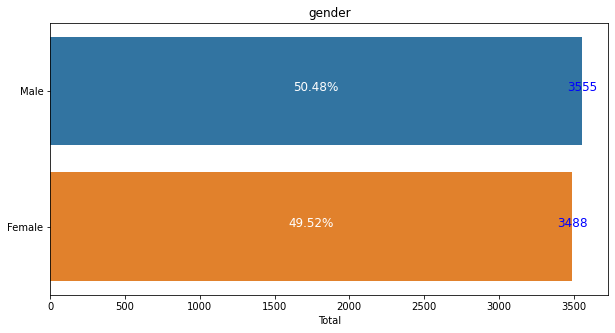

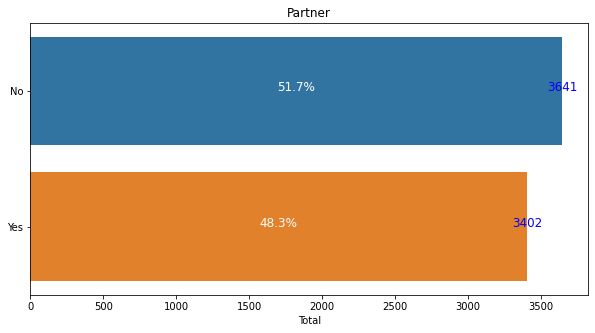

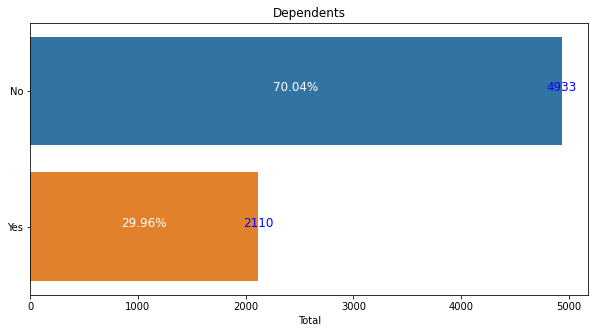

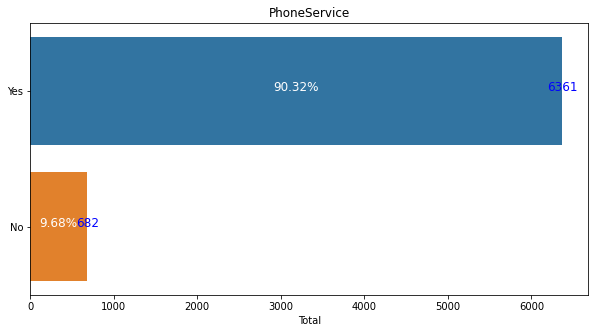

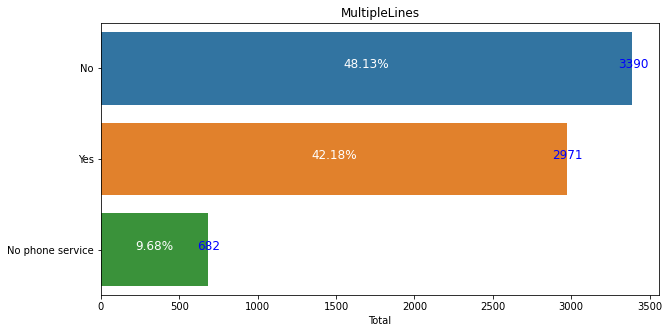

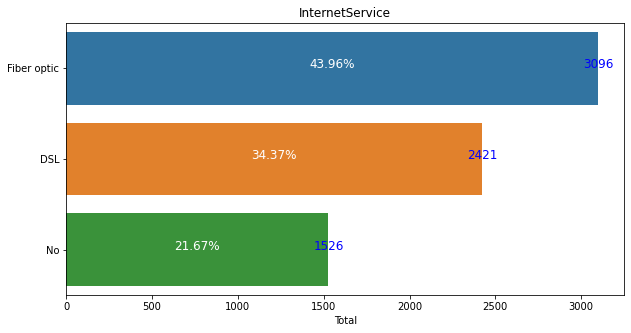

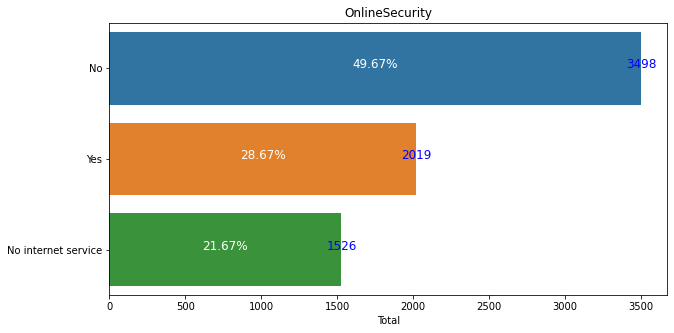

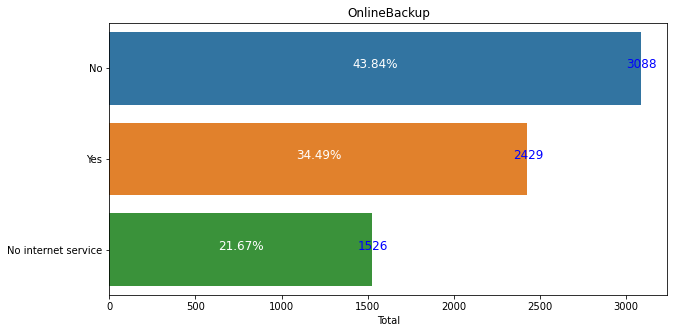

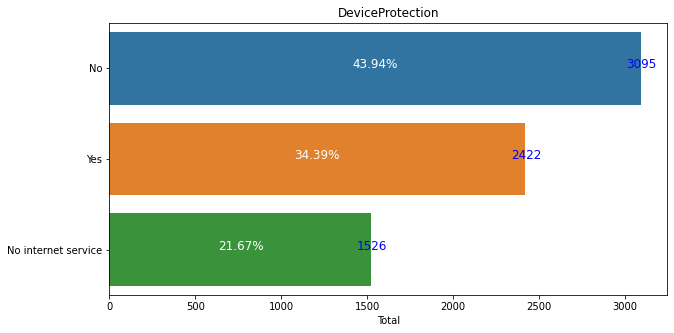

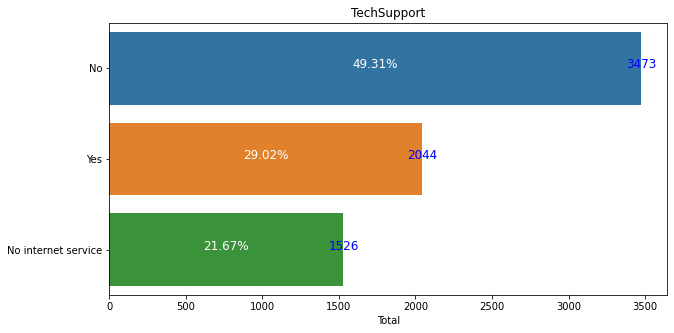

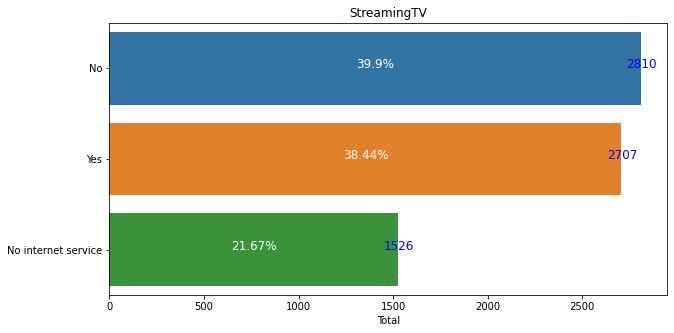

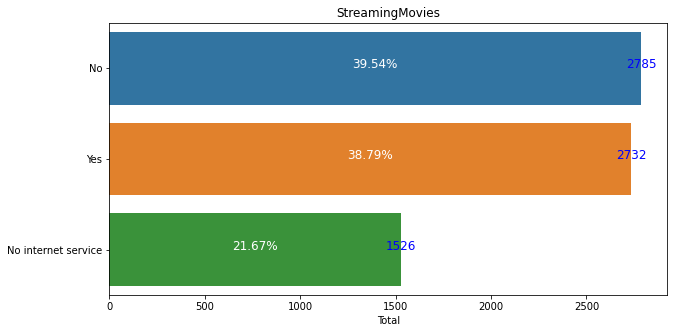

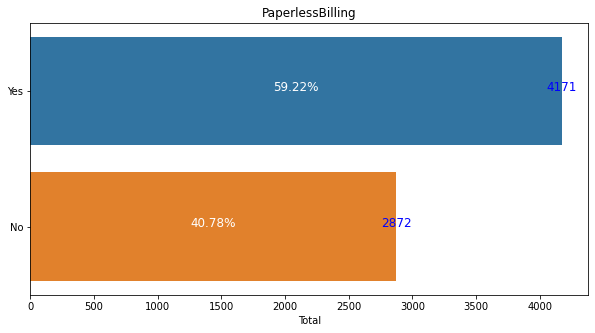

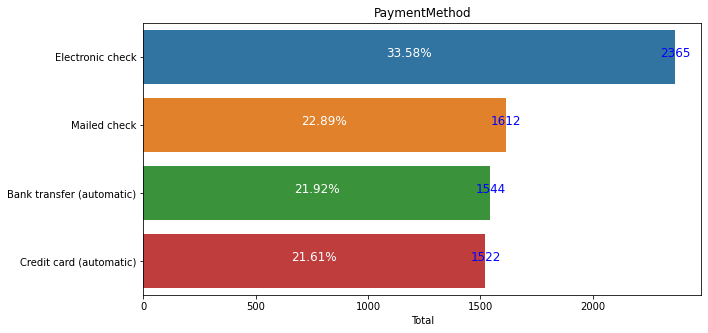

In [ ]:
for col in listcategorical1:
    prob_category(data=df ,top_n=5, col=col,abs_value ="Total",rel_value ="Percent",show_plot=True, title=col,figsize=(10,5))


In [ ]:
def plot(data):
  plt.figure(figsize=(6,6))
  bar =sns.barplot(data=data,x=data.index,y="Total")
  i = 0
  for tot,perc in zip(data['Total'],data['%']):
    bar.text(i,
            tot/2,
            str(np.round(perc*100,2))+ "%",
            fontdict=dict(color='White',fontsize=12,horizontalalignment="center"))
    bar.text(i,
            tot+10,
            str(tot),
            fontdict=dict(color='blue',fontsize=12,horizontalalignment="center"))
    
    i+=1
  plt.title("Churned Distribution")
  plt.legend()

  

In [ ]:
def table(data,column,index,value,aggf):
    count = data[data[column]=='Yes'].pivot_table(index=index,columns=column,values=value, aggfunc=aggf)
    prct  = round(count/data[data[column]=='Yes'].shape[0],3)
    data  = pd.concat([count,prct],axis=1)
    data.columns = ['Total','%']
    plot(data)
    return data 

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn Binary'],
      dtype='object')

**now let's compare where churm is yes by categorical**

No handles with labels found to put in legend.


,Total,%
gender,,
Female,939,0.502
Male,930,0.498


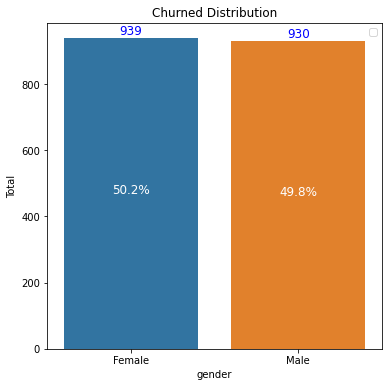

In [ ]:
table(data=df,column='Churn',index='gender',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
SeniorCitizen,,
0,1393,0.745
1,476,0.255


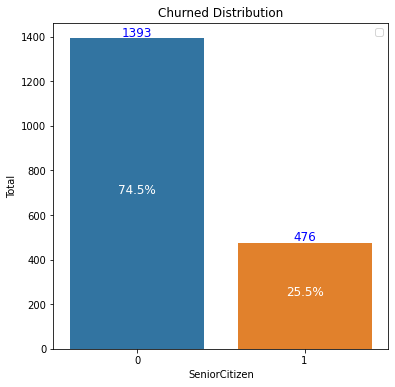

In [ ]:
table(data=df,column='Churn',index='SeniorCitizen',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
PhoneService,,
No,170,0.091
Yes,1699,0.909


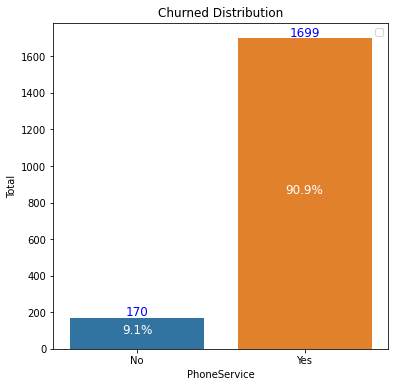

In [ ]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
PhoneService,,
No,170,0.091
Yes,1699,0.909


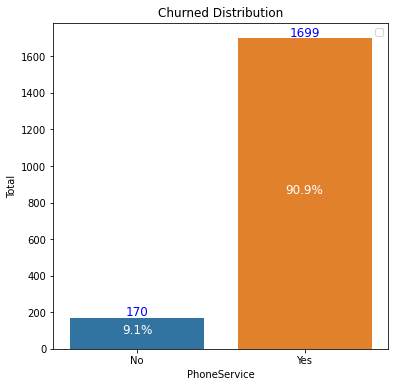

In [ ]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
Dependents,,
No,1543,0.826
Yes,326,0.174


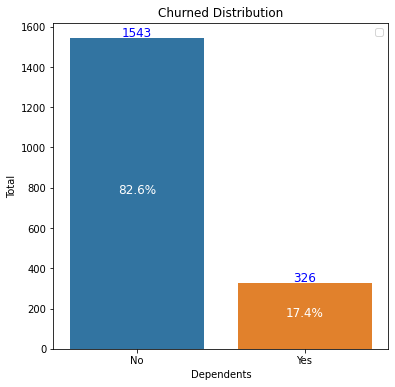

In [ ]:
table(data=df,column='Churn',index='Dependents',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
MultipleLines,,
No,849,0.454
No phone service,170,0.091
Yes,850,0.455


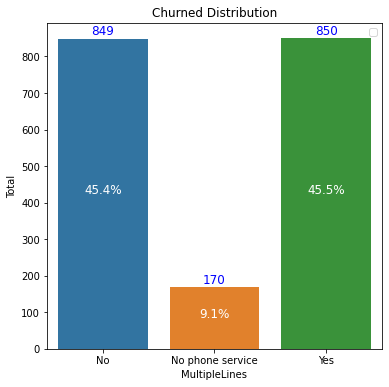

In [ ]:
table(data=df,column='Churn',index='MultipleLines',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
InternetService,,
DSL,459,0.246
Fiber optic,1297,0.694
No,113,0.060


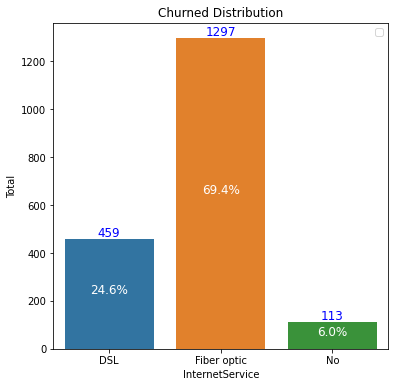

In [ ]:
table(data=df,column='Churn',index='InternetService',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
OnlineBackup,,
No,1233,0.66
No internet service,113,0.06
Yes,523,0.28


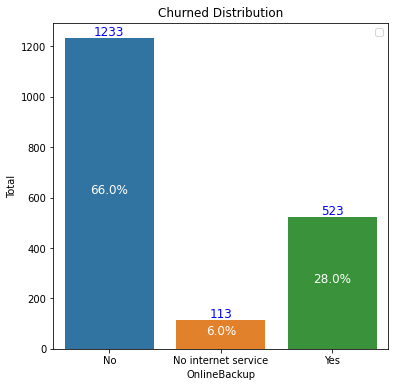

In [ ]:
table(data=df,column='Churn',index='OnlineBackup',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
DeviceProtection,,
No,1211,0.648
No internet service,113,0.060
Yes,545,0.292


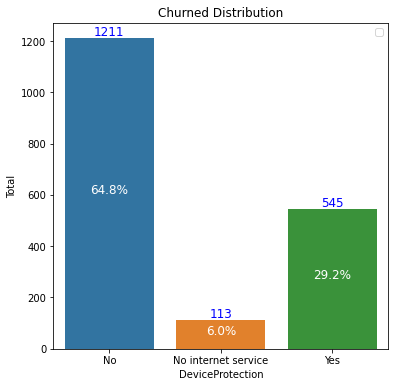

In [ ]:
table(data=df,column='Churn',index='DeviceProtection',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
TechSupport,,
No,1446,0.774
No internet service,113,0.060
Yes,310,0.166


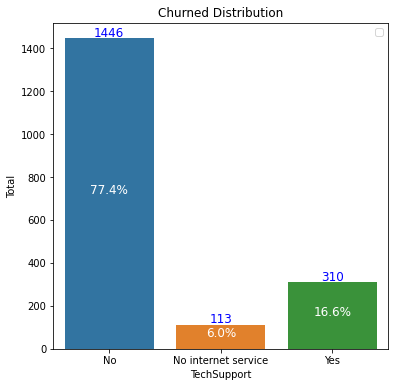

In [ ]:
table(data=df,column='Churn',index='TechSupport',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
StreamingTV,,
No,942,0.504
No internet service,113,0.060
Yes,814,0.436


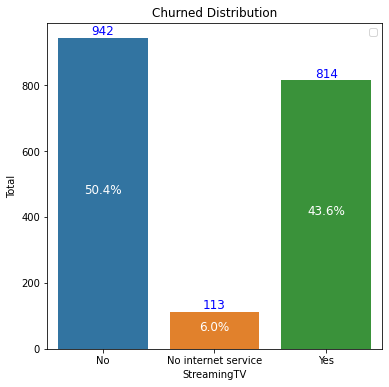

In [ ]:
table(data=df,column='Churn',index='StreamingTV',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
StreamingMovies,,
No,938,0.502
No internet service,113,0.060
Yes,818,0.438


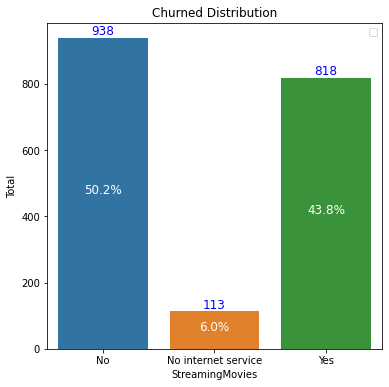

In [ ]:
table(data=df,column='Churn',index='StreamingMovies',value='customerID', aggf='count')

No handles with labels found to put in legend.


,Total,%
Contract,,
Month-to-month,1655,0.886
One year,166,0.089
Two year,48,0.026


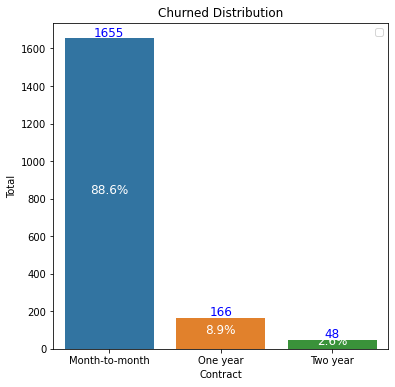

In [ ]:
table(data=df,column='Churn',index='Contract',value='customerID', aggf='count')


No handles with labels found to put in legend.


,Total,%
PaymentMethod,,
Bank transfer (automatic),258,0.138
Credit card (automatic),232,0.124
Electronic check,1071,0.573
Mailed check,308,0.165


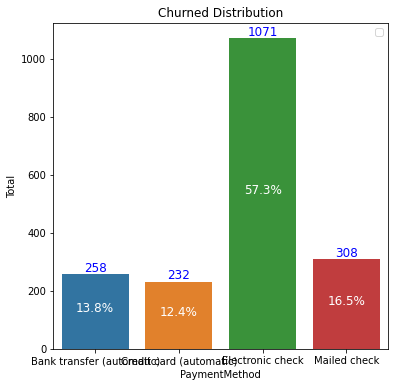

In [ ]:
table(data=df,column='Churn',index='PaymentMethod',value='customerID', aggf='count')


No handles with labels found to put in legend.


,Total,%
PaperlessBilling,,
No,469,0.251
Yes,1400,0.749


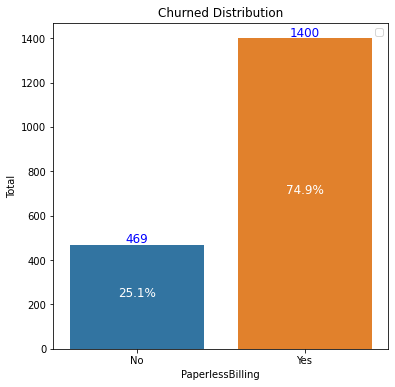

In [ ]:
table(data=df,column='Churn',index='PaperlessBilling',value='customerID', aggf='count')

C:\Users\Solutions\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:244: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\Solutions\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


<AxesSubplot:>

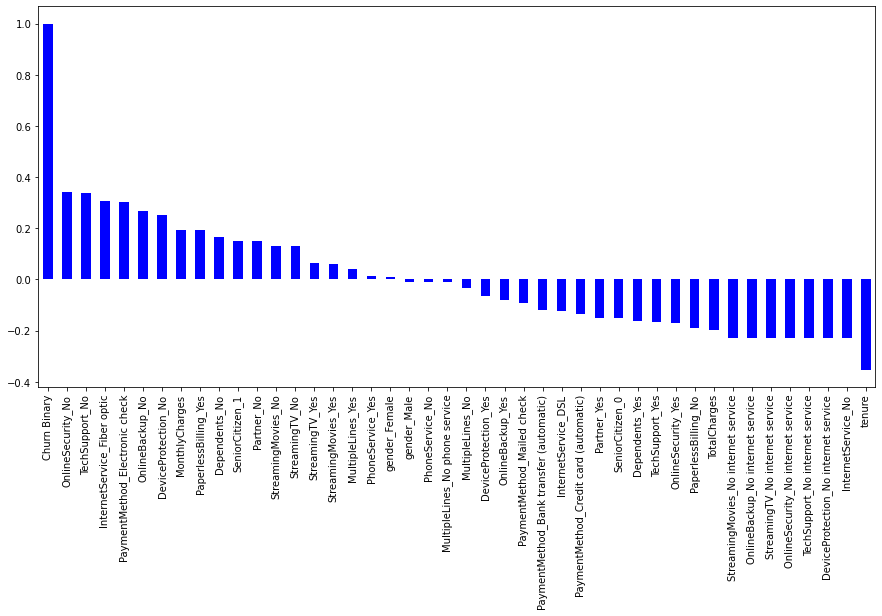

In [ ]:
plt.figure(figsize=(15,7))
df_dummies.corr()['Churn Binary'].sort_values(ascending=False).plot(kind='bar',color = "blue", cmap="autumn")

Text(0.5, 1.0, 'Correlation HeatMap')

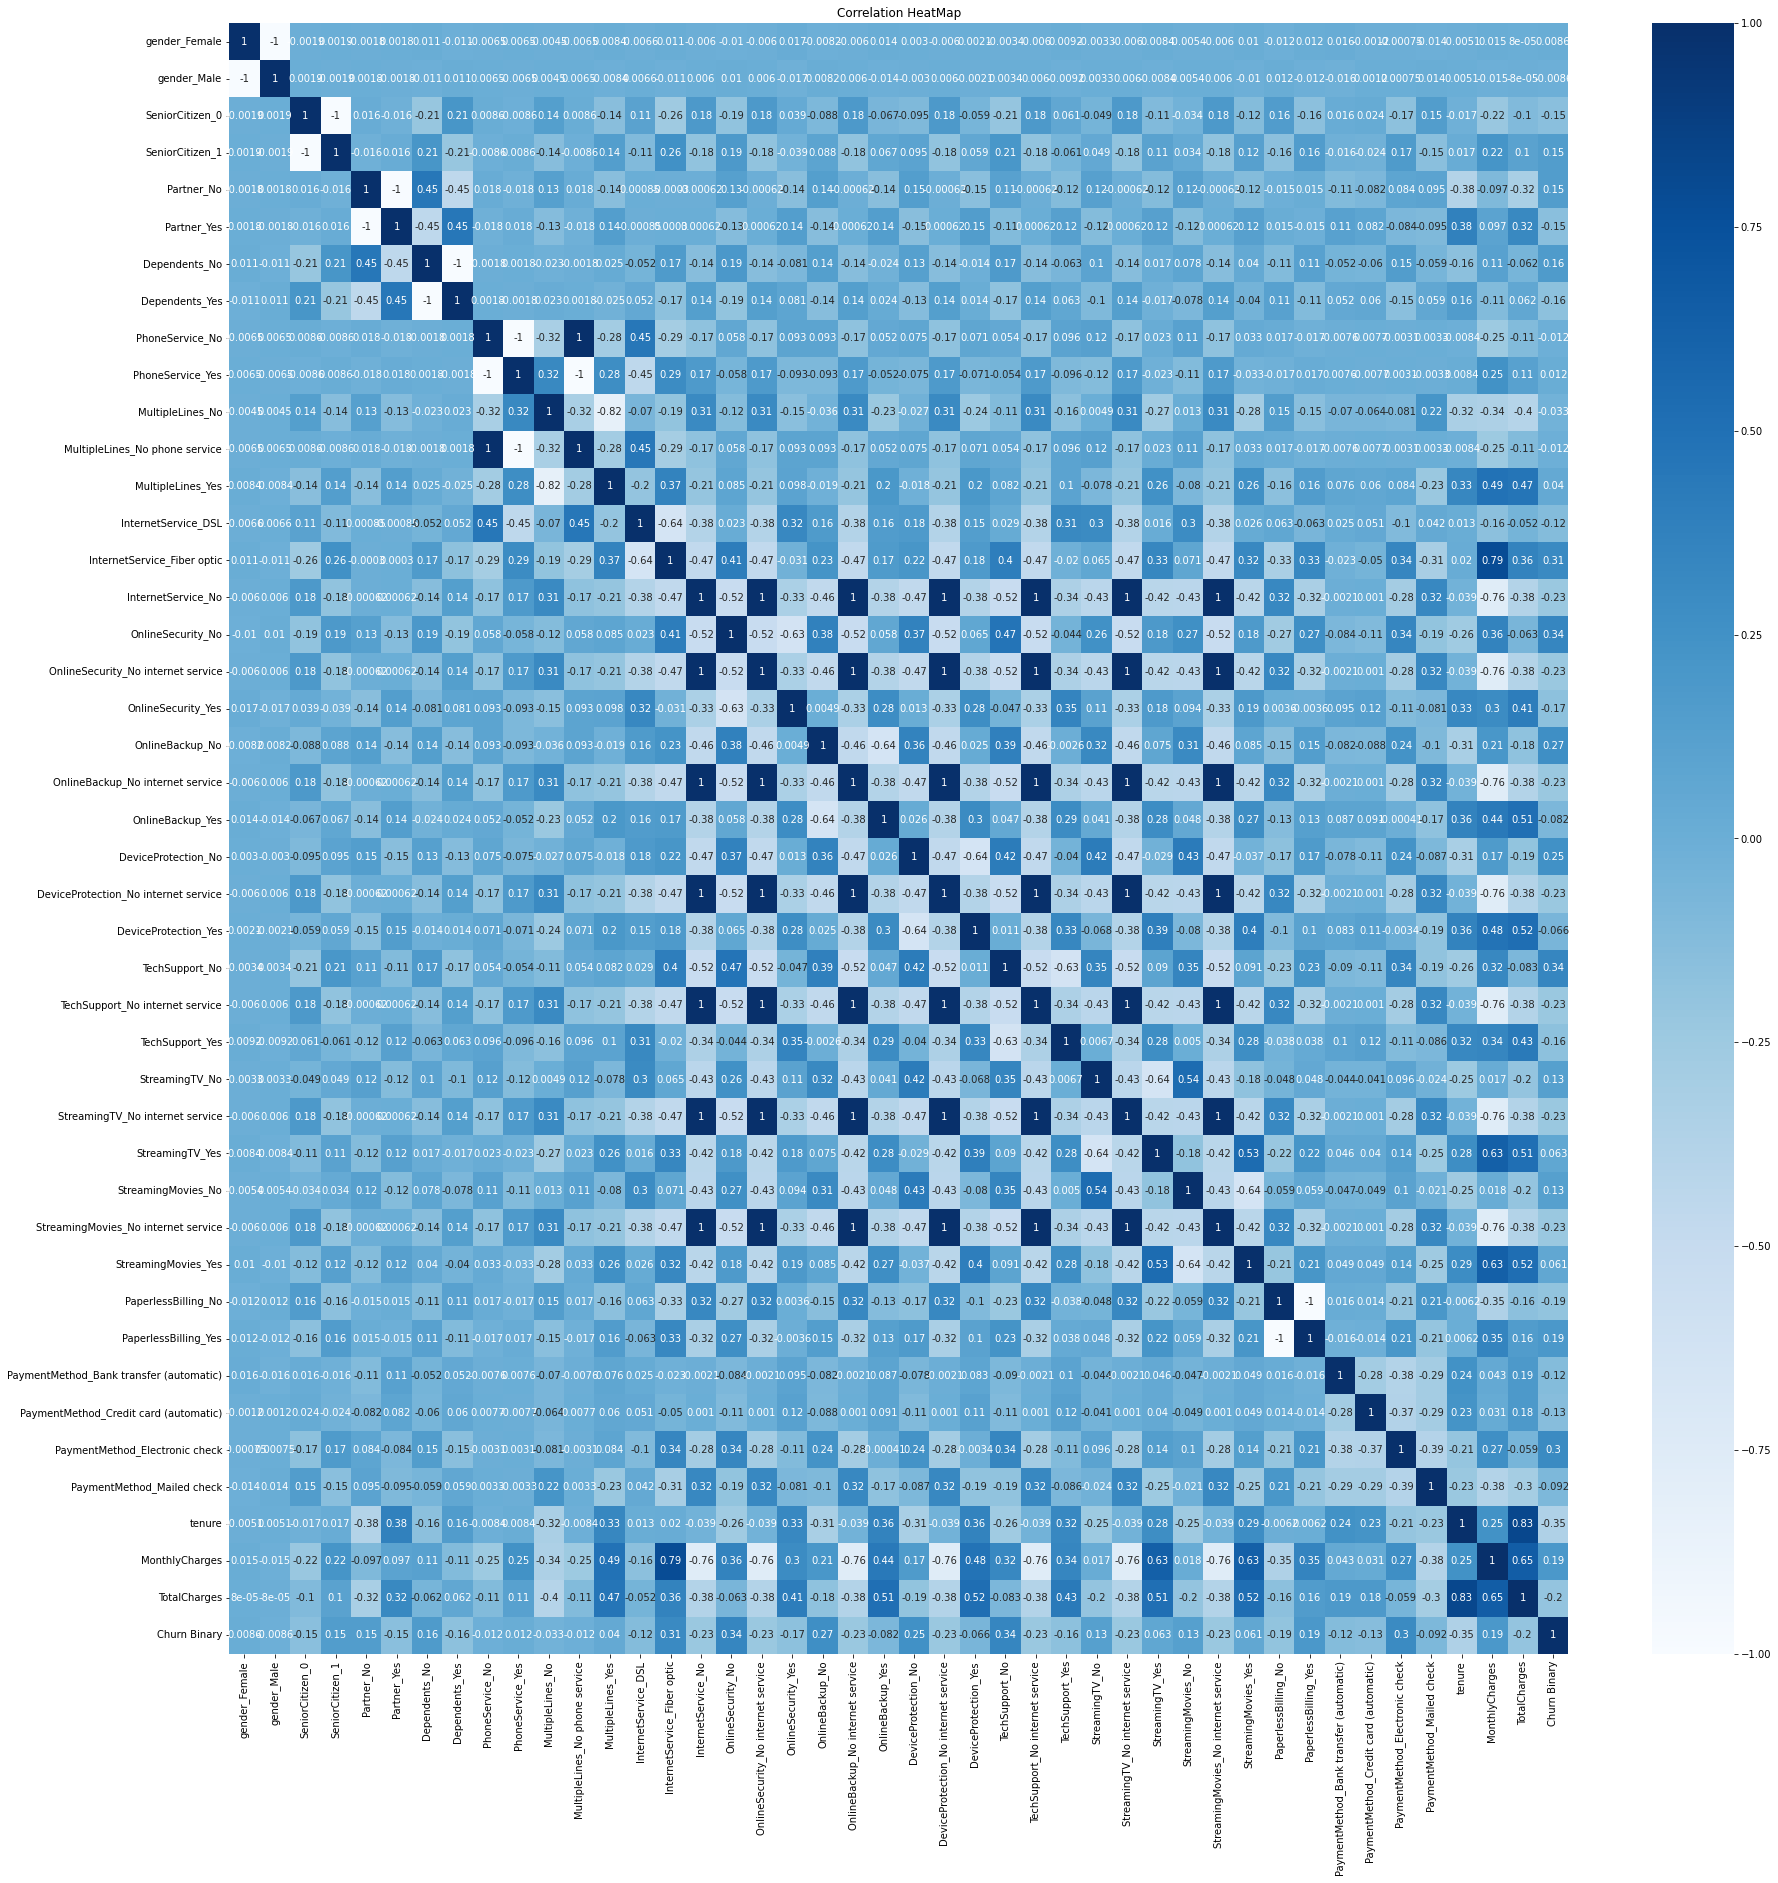

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_dummies.corr(), annot=True, cmap='Blues')
plt.title('Correlation HeatMap')

In [ ]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Binary
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No,0


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn Binary        0
dtype: int64